# スパース学習

## ライブラリなど読み込み

In [68]:
import numpy as np               
import matplotlib.pyplot as plt  

## スパース回帰分析

## データ生成

In [69]:
n = 30       # データ数
d = 50       # パラメータの次元
s = 10       # パラメータの非ゼロ要素数

# データ生成
w = np.r_[np.ones(s), np.zeros(d-s)]
X = np.random.randn(n,d)
y = np.dot(X,w) + np.random.normal(scale=0.1,size=n)

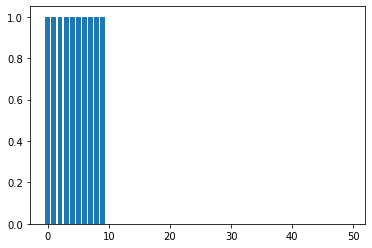

In [70]:
# 係数ベクトル w のプロット
plt.bar(np.arange(d),w); plt.show()

## Lasso(ラッソ)
sklearn.linear_model.Lasso

In [71]:
# モジュール読み込み
from sklearn import linear_model

In [72]:
# Lasso
la = linear_model.Lasso(alpha=1/n)
la.fit(X,y)

Lasso(alpha=0.03333333333333333, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

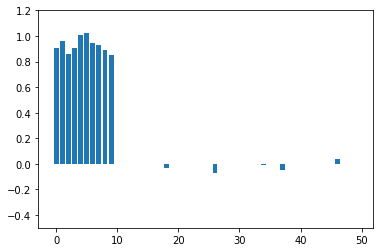

In [73]:
# プロット：ラッソによる推定結果
plt.bar(np.arange(d),la.coef_); plt.ylim(-0.5, 1.2); plt.show()

## 参考：リッジ回帰

In [74]:
# リッジ回帰
ri = linear_model.Ridge(alpha=1)
ri.fit(X,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

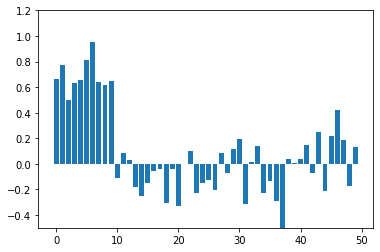

In [75]:
# プロット：リッジ回帰による推定結果
plt.bar(np.arange(d),ri.coef_); plt.ylim(-0.5, 1.2); plt.show()

## ラッソの交差検証法
sklearn.linear_model.LassoCV

In [90]:
cvl = linear_model.LassoCV(cv=5)
cvl.fit(X, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [91]:
# 選択された alpha
cvl.alpha_

0.08651750875461282

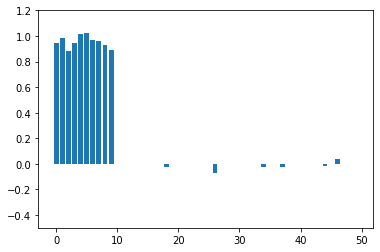

In [78]:
# プロット：推定された回帰係数 (coef_)
plt.bar(np.arange(d),cvl.coef_); plt.ylim(-0.5, 1.2); plt.show()

## エラスティック・ネット

## データ生成

In [79]:
n, d, s = 100, 200, 20     # 設定：データ数， 次元
w = np.r_[np.ones(s), np.zeros(d-s)] + np.random.normal(scale=0.2,size=d)
# データ生成
X = np.random.randn(n,d)
y = np.dot(X, w) + np.random.normal(scale=0.01,size=n)

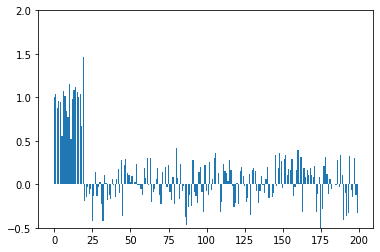

In [80]:
# 係数ベクトル w のプロット
plt.bar(np.arange(d), w); plt.ylim(-0.5, 2); plt.show()

## エラスティックネット
- sklearn.linear_model.ElasticNet

In [81]:
er = linear_model.ElasticNet(alpha=0.1, l1_ratio=0.5)    # モデル設定 
er.fit(X,y)               # データを学習

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

## 推定結果

非ゼロ要素数/d：  0.52


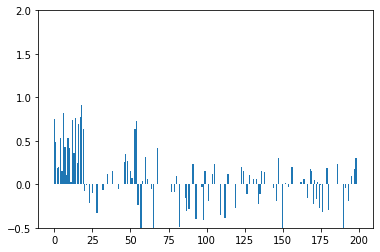

In [82]:
print("非ゼロ要素数/d： ",np.sum(er.coef_ != 0)/d)
plt.bar(np.arange(d), er.coef_); plt.ylim(-0.5, 2); plt.show()

## 参考：ラッソ  (l1_ratio=1)

非ゼロ要素数/d：  0.41


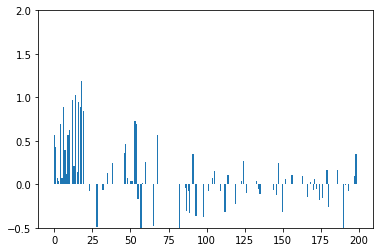

In [92]:
er = linear_model.ElasticNet(alpha=0.1, l1_ratio=1).fit(X,y)    # モデル設定・学習

print("非ゼロ要素数/d： ",np.sum(er.coef_ != 0)/d)
plt.bar(np.arange(d), er.coef_); plt.ylim(-0.5, 2); plt.show()

##  エラスティックネットの交差検証法
- sklearn.linear_model.ElasticNetCV

In [84]:
# l1_ratio の候補
rs = np.arange(0.05,1,0.05)
rs
# alpha の候補は自動的に設定

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [85]:
# エラスティックネットの交差検証法
cver = linear_model.ElasticNetCV(cv=5, l1_ratio=rs) 
cver.fit(X,y)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

## 最適な正則化パラメータ

In [86]:
cver.l1_ratio_

0.1

In [87]:
cver.alpha_

0.01621180152868694

## プロット：推定された回帰係数

非ゼロ要素数/d：  0.835


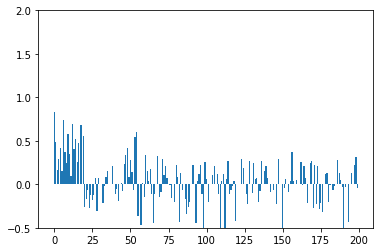

In [88]:
print("非ゼロ要素数/d： ",np.sum(cver.coef_ != 0)/d)
plt.bar(np.arange(d), cver.coef_); plt.ylim(-0.5, 2); plt.show()

## 参考：ラッソの結果

非ゼロ要素数/d：  0.415


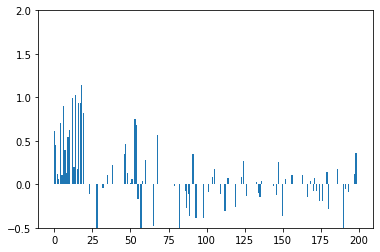

In [89]:
cvl = linear_model.LassoCV(cv=5).fit(X,y)  # alphaを適当に設定．CVで選択

print("非ゼロ要素数/d： ", np.sum(cvl.coef_ != 0)/d)
plt.bar(np.arange(d), cvl.coef_); plt.ylim(-0.5, 2); plt.show()